<a href="https://colab.research.google.com/github/MaggieWelch/labs/blob/main/MHW_APIs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Practice writing queries using the saferproducts.gov API and your web browser.



2. Practice with the saferproducts.gov API and the above code in a notebook to see how API's work, in general.

In [ ]:
import pandas as pd
import urllib.request
import json
url = 'https://www.saferproducts.gov/RestWebServices/'
query = 'Recall?format=json&ProductType=Toys'
response = urllib.request.urlopen(url+query)
response_bytes = response.read()
data = json.loads(response_bytes)
response.close()



In [ ]:
import urllib.request
import json
url = 'https://www.saferproducts.gov/RestWebServices/'
query = 'Recall?format=json&ProductType=Blender'
response = urllib.request.urlopen(url+query)
response_bytes = response.read()
data = json.loads(response_bytes)
response.close()
df = pd.DataFrame.from_dict(data)

3. Convert this code chunk into a function you can reuse to flatten dictionaries, or explain clearly the problems you run into while attempting to do so. Make some tables or plots.




In [ ]:
temp = df['RemedyOptions']
clean_values = []
for i in range(len(temp)):
    if len(temp[i])>0:
        values = []
        for j in range(len(temp[i])):
            values.append(temp[i][j]['Option'] )
        clean_values.append(values)
    else:
        clean_values.append('')
df['remedy'] = clean_values
print(df['remedy'])

0     [New Instructions]
1               [Repair]
2               [Repair]
3              [Replace]
4               [Repair]
5               [Refund]
6               [Refund]
7                       
8                       
9                       
10                      
11                      
Name: remedy, dtype: object


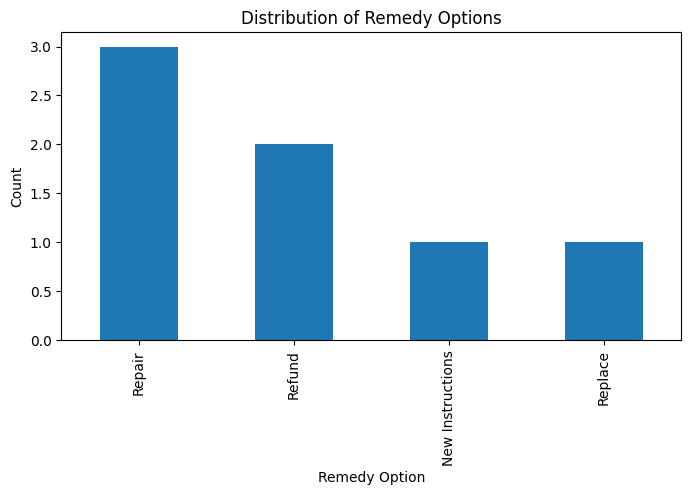

In [ ]:
import matplotlib.pyplot as plt

# Flatten the list of remedies into individual items for plotting
remedy_flat = [item for sublist in df['remedy'] if isinstance(sublist, list) for item in sublist]

# Plot the remedy option counts
plt.figure(figsize=(8, 4))
pd.Series(remedy_flat).value_counts().plot(kind='bar')
plt.title("Distribution of Remedy Options")
plt.xlabel("Remedy Option")
plt.ylabel("Count")
plt.show()



5. Pick an API, download some data, wrangle them, and produce some EDA results, as we did in the previous steps with the saferproducts.gov API; or, if you can't get it to work, document why. If you have the time and it's low cost, push the results to a streamlit page. If you have had enough, I recommend https://www.eia.gov/opendata/browser/electricity, since there is a friendly query builder that you can use to learn.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
import json

#Buiding query
url = 'https://api.eia.gov/v2/electricity/state-electricity-profiles/source-disposition/data/'
query = '?frequency=annual&data[0]=combined-heat-and-pwr-comm&data[1]=combined-heat-and-pwr-elect&data[2]=facility-direct&sort[0][column]=period&sort[0][direction]=desc&offset=0&length=5000'

#Query the api
response = urllib.request.urlopen(url + query)
response_bytes = response.read()
data = json.loads(response_bytes)
print(data)
response.close()

#Convert results into a data frame
df = pd.DataFrame.from_dict(data['response']['data'])
df.to_csv('electricity_data.csv')
df.head()

HTTPError: HTTP Error 403: Forbidden

I understand what each line of code does, however when I query the API for whatever reason it will not run the "response" variable that outputs the combination of the url and query. If the line were to have run, ideally the rest of the code would read in the data from the query, convert the byte data into a python list, print the data, and then close the response object.